<a href="https://colab.research.google.com/github/JRzo/Data_Analytics_Projects/blob/main/MobileDevices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("valakhorasani/mobile-device-usage-and-user-behavior-dataset")

print("Path to dataset files:", path)





Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/versions/1


In [ ]:
!pip install  --upgrade  visions
!pip install -U ydata-profiling # Install the ydata-profiling package using pip

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=15b5da53122ff441e3669132ed6a931052f6246e9d6547e9895c3053a6968496
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

In [ ]:
# We have to get 5 questions with our data


df = pd.read_csv("//user_behavior_dataset[1].csv")
df.head()




,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


<Figure size 1500x800 with 0 Axes>

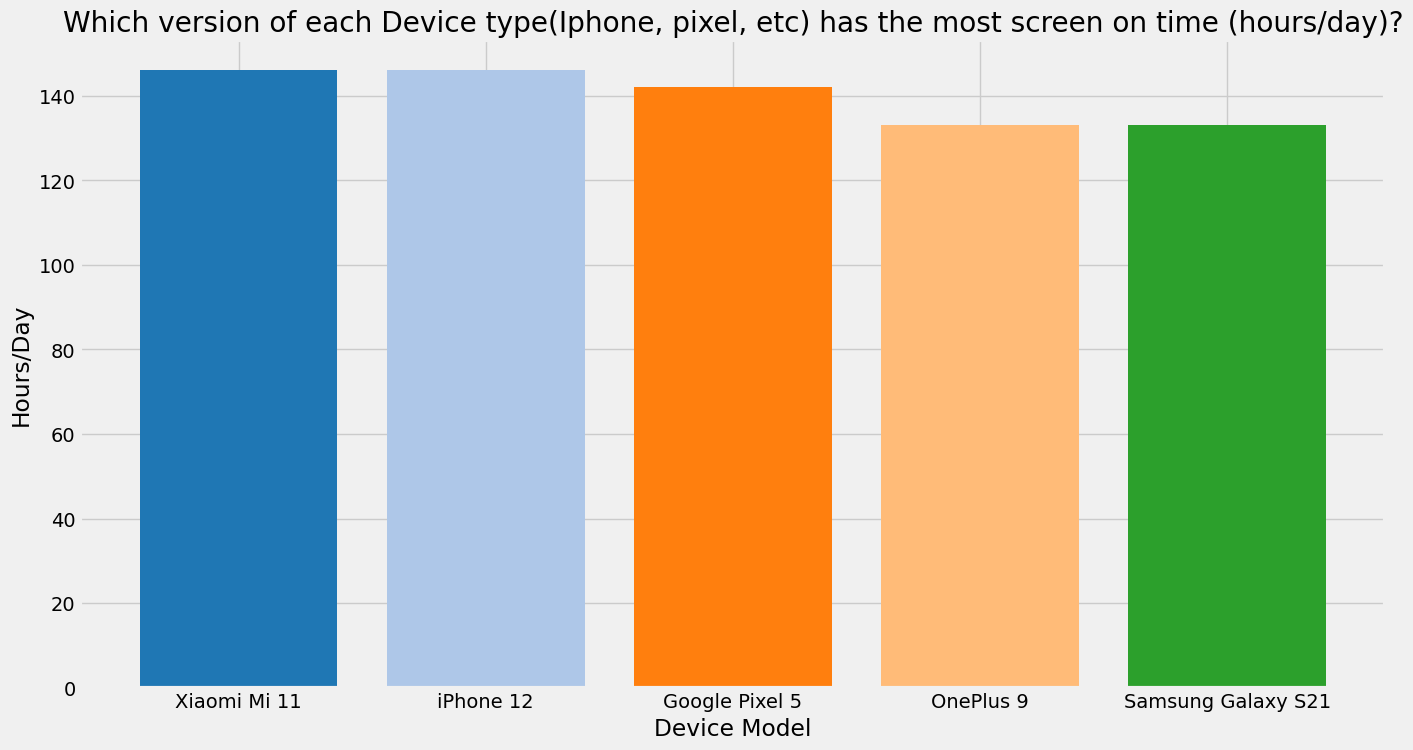

<Figure size 1500x800 with 0 Axes>

In [ ]:
"""# Which version of each Device type(Iphone, pixel, etc) has the most screen on time (hours/day)"""

devices = df['Device Model'].loc[df['Screen On Time (hours/day)'] == (df['Screen On Time (hours/day)'])].value_counts()
devices

plt.style.use('fivethirtyeight')
colors = plt.get_cmap('tab20')(np.linspace(0,1,20, len(devices)))
# For plot
fig,ax = plt.subplots(figsize=(15,8))

plt.xlabel("Device Models")
plt.ylabel("Hours/Day")
plt.title("Which version of each Device type(Iphone, pixel, etc) has the most screen on time (hours/day)?")


ax.bar(devices.index, devices.values, color=colors)
plt.figure(figsize=(15,8))


In [ ]:
"""
Which gender has the most applications on their phone? + (MAX) (MIN) STD
"""


apps_gen = df['Gender'].loc[df['Number of Apps Installed'] == (df['Number of Apps Installed'])].value_counts() / len(df['Gender']) * 100
apps_gen
print(f"On Average {apps_gen}")




On Average Gender
Male      52.0
Female    48.0
Name: count, dtype: float64


<Axes: title={'center': 'What age group has the most data usage?'}, xlabel='Age Groups', ylabel='Data Usage (MB/day)'>

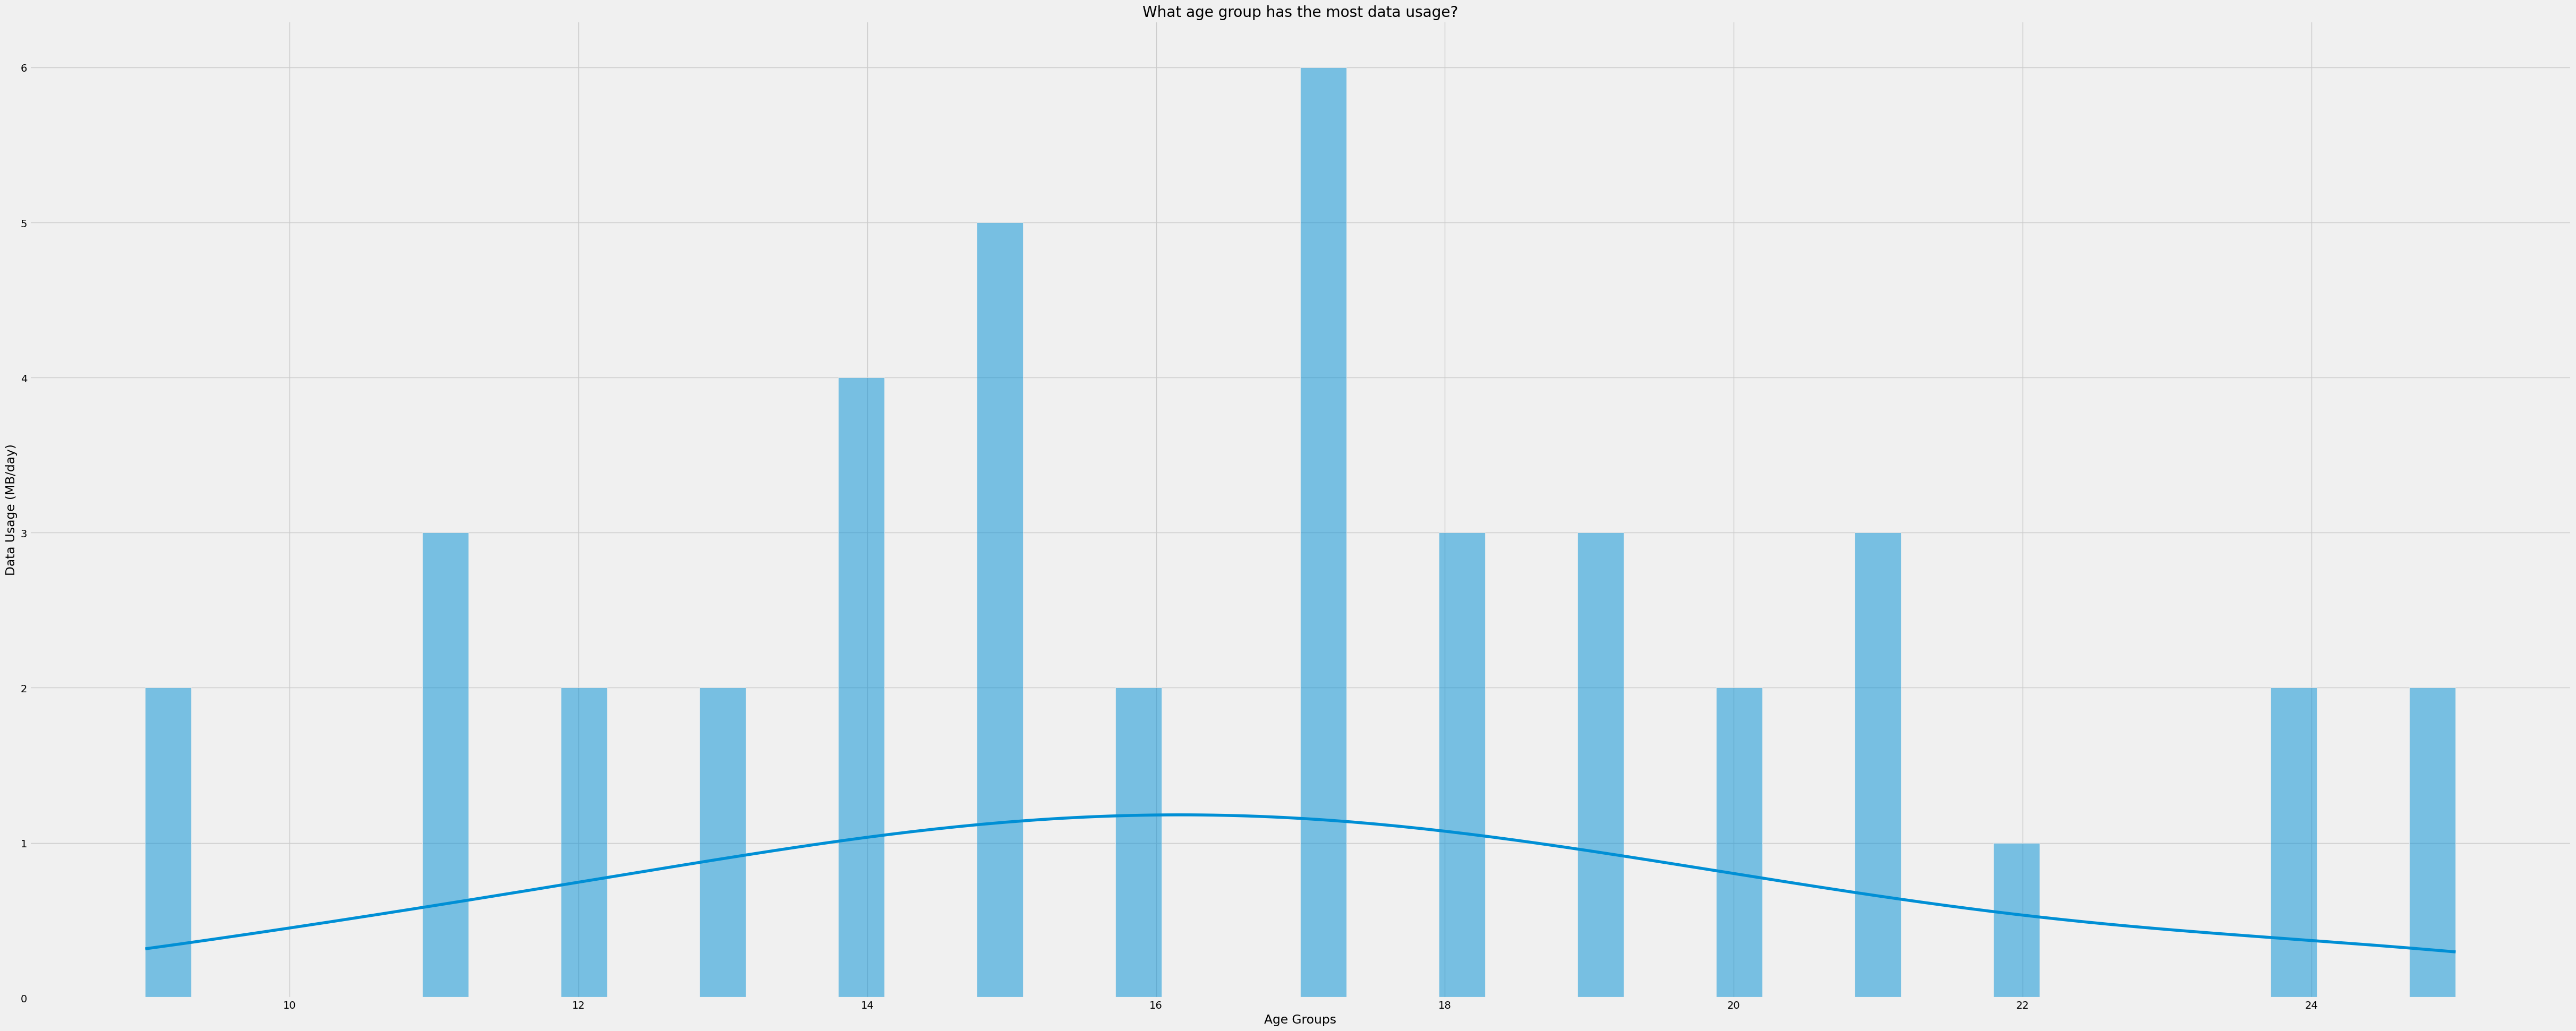

In [ ]:
"""
What age group has the most data usage?
*Who has the most data usage?
*Who has the least data usage?


"""

age_groups = df["Age"].loc[df['Data Usage (MB/day)'] == (df['Data Usage (MB/day)'])].value_counts().sort_values(ascending=True)
age_groups


plt.style.use('fivethirtyeight')
colors = plt.get_cmap('tab20')(np.linspace(0,20,80, len(age_groups)))

fig,ax = plt.subplots(1,1,
                      figsize=(55,20))

plt.xlabel("Age Groups")
plt.ylabel("Data Usage (MB/day)")
plt.title("What age group has the most data usage?")
sns.histplot(age_groups, bins=50, kde=True)


<Axes: xlabel='Operating System', ylabel='App Usage Time (min/day)'>

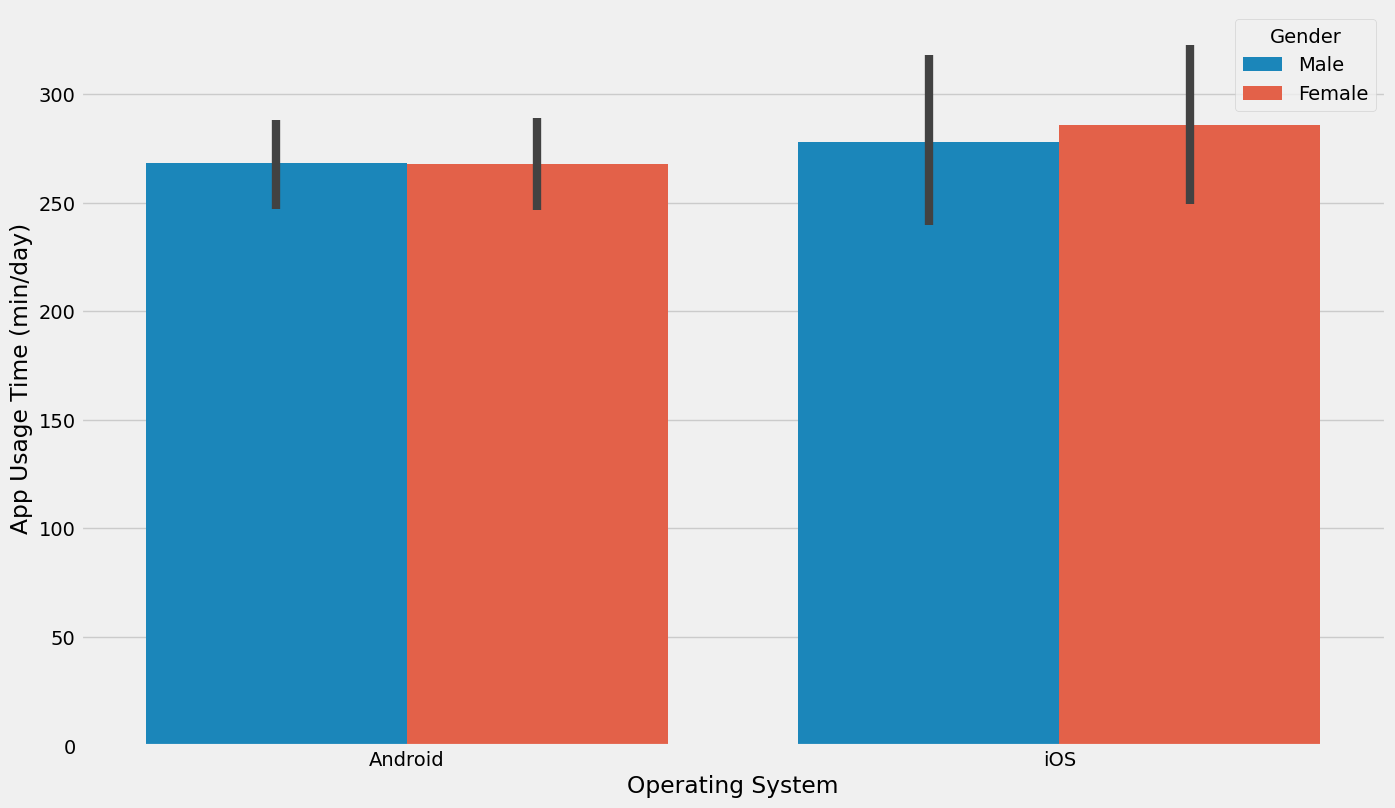

In [ ]:
"""
*What operating system is the most popular among users?
*What operating system is the least popular among users?
"""


plt.figure(figsize=(15,8))
sns.barplot(data=df,x='Operating System',y='App Usage Time (min/day)',hue='Gender')

<Axes: xlabel='Operating System', ylabel='User Behavior Class'>

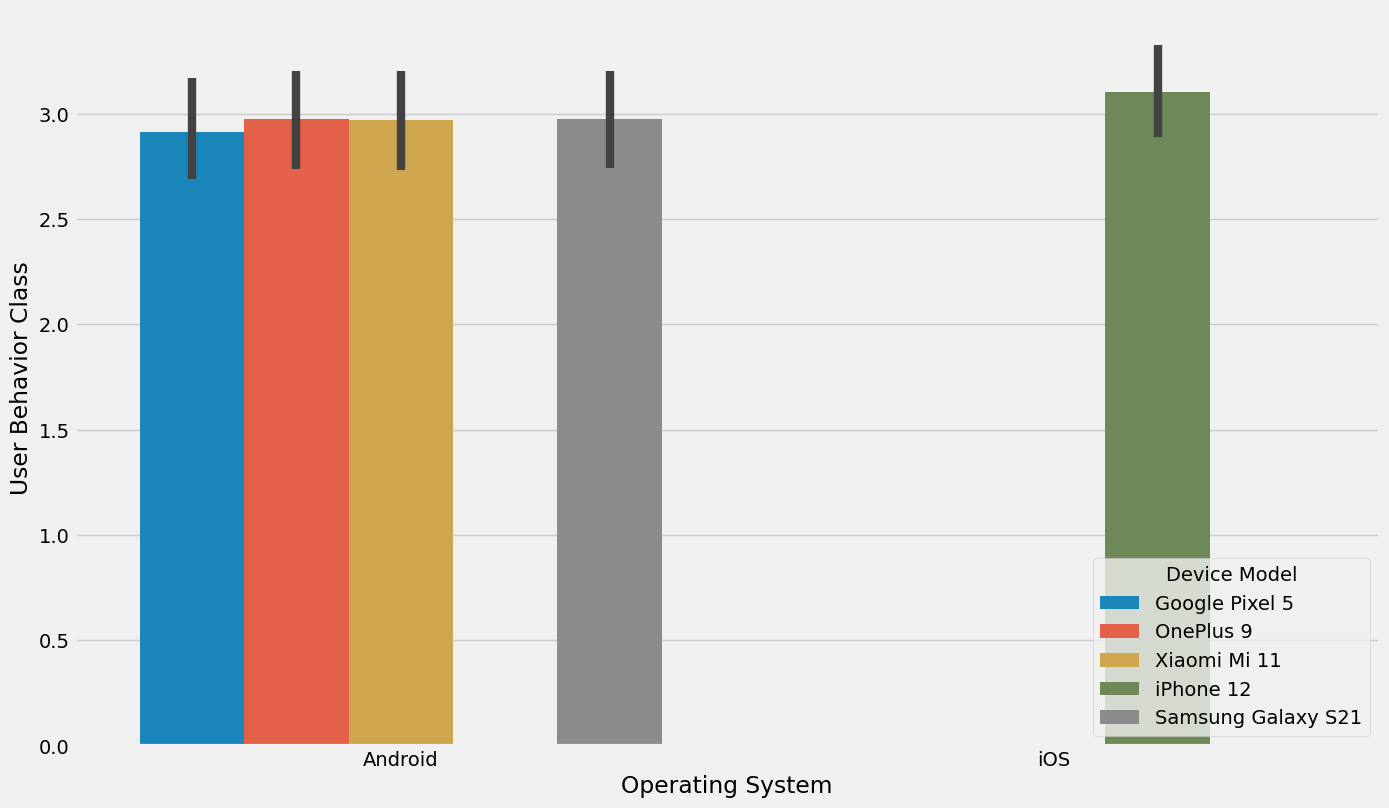

In [ ]:
"""
*Which device has the highest behavioral class
*Which device has the lowest behavioral class

"""


plt.figure(figsize=(15,8))
sns.barplot(data=df,x='Operating System',y='User Behavior Class',hue='Device Model')

In [ ]:
# Creating a report

profile = ProfileReport(df,title='Mobile Device Usage Project')
profile.to_file('reportMobile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]